In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import pandas as pd

import seaborn as sns
sns.set_style("darkgrid")

import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("Pokemon.csv")
print("Number of rows:", len(data))
data.head(10)

Number of rows: 800


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [5]:
data['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

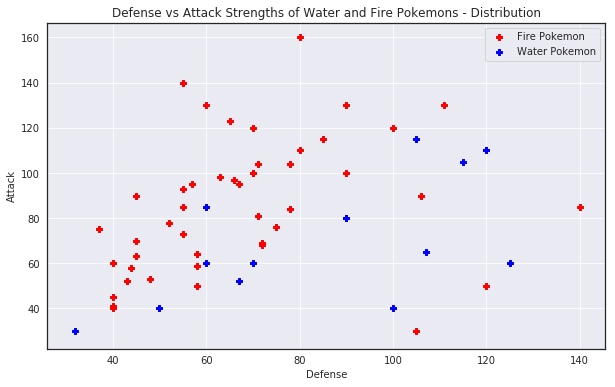

In [7]:
# Fire and Water pokemons
fire = data[data['Type 1'] == "Fire"]
water = data[data['Type 2'] == "Water"]

f = plt.figure(figsize=(10,6))
ax = f.add_subplot(111)
ax.scatter(fire['Defense'], fire['Attack'], c="r", marker='P', label="Fire Pokemon")
ax.scatter(water['Defense'], water['Attack'], c="b", marker='P', label="Water Pokemon")

ax.set_xlabel("Defense")
ax.set_ylabel("Attack")
ax.legend()
ax.set_title("Defense vs Attack Strengths of Water and Fire Pokemons - Distribution")

#border
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.25

plt.show()

__Advantages and Disadvantages__

The scatter plot shows a clear picture of the distribution of strengths - it can easily be noticed that distribution of fire pokemon is more towards the left side of the plot (<80 defense), implying that most of them have low defense strength. 
It can also be seen that the skew in distribution for water pokemon are inclined towards the right - most of them have good defense mechanisms.

However it is difficult to precisely say how many of those pokemon have _this_ amount of attack/defense strength.

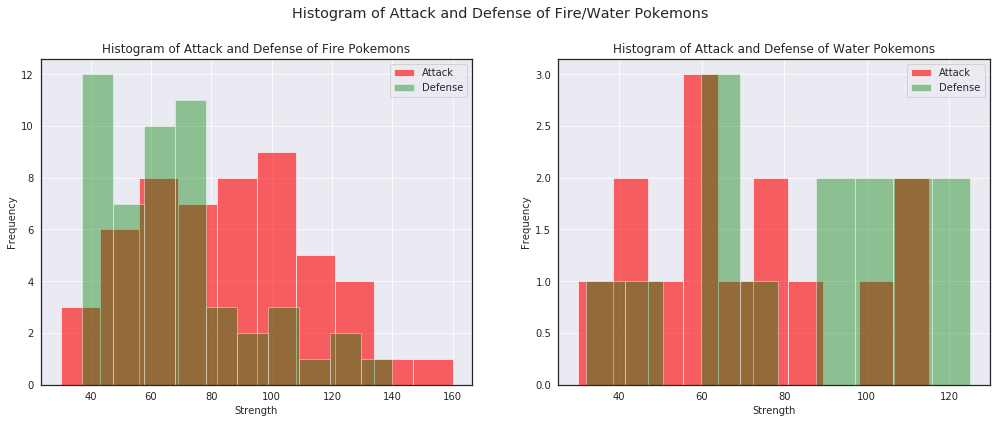

In [8]:
# Distribution of histograms of defense and attacks for Fire and Water pokemons

f = plt.figure(figsize=(17,6))
st = f.suptitle("Histogram of Attack and Defense of Fire/Water Pokemons", fontsize="x-large")


ax1 = f.add_subplot(121)
ax1.hist(fire["Attack"], color="r", alpha=0.6, label="Attack")
ax1.hist(fire["Defense"], color="g", alpha=0.4, label="Defense")
ax1.set_xlabel("Strength")
ax1.set_ylabel("Frequency")
ax1.set_title("Histogram of Attack and Defense of Fire Pokemons")
ax1.legend()

ax2 = f.add_subplot(122)
ax2.hist(water["Attack"], color="r", alpha=0.6, label="Attack")
ax2.hist(water["Defense"], color="g", alpha=0.4, label="Defense")
ax2.set_title("Histogram of Attack and Defense of Water Pokemons")
ax2.set_xlabel("Strength")
ax2.set_ylabel("Frequency")
ax2.legend()

st.set_y(1.0)

#border
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.25

plt.show()

__Advantages and Disadvantages__

The plot shows the same data used the scatter plot above. However we have a more granular view of the data presented. One can clearly understand the shift towards left in the defense of fire pokemons. Also, in case of water pokemons, we see the green bars are more towards the right end of the graph - indicating their greater defense strength. 

In the histogram plot, we see quite an overlap of the two histograms (attack and defense) in each of the plots. The region of where the bars overlap can be a little confusing for the reader while interpreting the plots.

__Why some encodings were preferred/avoided__

In the scatter plot blue and red are quite constrasting colors and are well distingushable from each other. Also the "+" marker was chosen over the regualar ".". Since the number of data points in the filtered data (by fire/water) are less, this makes better sense to distinctly show where the points lie.

In the second diagram green and red were chosen for distinctly identifying the regions and "alphas" were set so that even though the regions in histogram overlaps, one can still identify the regions.


__Which plot would you prefer? Why?__

Creating these histograms require more effort compared to the scatter plot - so unless the use case demands precision of frequency in the distribution, I would prefer the scatter plot. It gives an estimate of the distribution and conveys the idea with more clarity.